# Prepare data

In [1]:
import pandas as pd

In [2]:
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

# Data Cleaning

In [3]:
#Convert to lower case
movies['title'] = movies.title.str.lower()

In [4]:
#split title name into name and year
movies[['name', 'year']] = movies['title'].str.split(' \(', 1, expand=True)

In [5]:
movies.head(3)

,movieId,title,genres,name,year
0,1,toy story (1995),Adventure|Animation|Children|Comedy|Fantasy,toy story,1995)
1,2,jumanji (1995),Adventure|Children|Fantasy,jumanji,1995)
2,3,grumpier old men (1995),Comedy|Romance,grumpier old men,1995)


In [6]:
#Replace Special characters
movies['year'] = movies['year'].str.replace("\)", "", regex=True) 
movies['year'] 

0       1995
1       1995
2       1995
3       1995
4       1995
        ... 
9737    2017
9738    2017
9739    2017
9740    2018
9741    1991
Name: year, Length: 9742, dtype: object

In [7]:
movies['genres'] = movies['genres'].str.replace("[^a-zA-Z0-9_]", ",", regex=True)
movies['genres']

0       Adventure,Animation,Children,Comedy,Fantasy
1                        Adventure,Children,Fantasy
2                                    Comedy,Romance
3                              Comedy,Drama,Romance
4                                            Comedy
                           ...                     
9737                Action,Animation,Comedy,Fantasy
9738                       Animation,Comedy,Fantasy
9739                                          Drama
9740                               Action,Animation
9741                                         Comedy
Name: genres, Length: 9742, dtype: object

In [8]:
#Ratings Df whats in it
ratings.head(3)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224


In [9]:
#Merge the two Dataframes
movies_ratings_df = pd.merge(movies,ratings, on = 'movieId')
movies_ratings_df

,movieId,title,genres,name,year,userId,rating,timestamp
0,1,toy story (1995),"Adventure,Animation,Children,Comedy,Fantasy",toy story,1995,1,4.0,964982703
1,1,toy story (1995),"Adventure,Animation,Children,Comedy,Fantasy",toy story,1995,5,4.0,847434962
2,1,toy story (1995),"Adventure,Animation,Children,Comedy,Fantasy",toy story,1995,7,4.5,1106635946
3,1,toy story (1995),"Adventure,Animation,Children,Comedy,Fantasy",toy story,1995,15,2.5,1510577970
4,1,toy story (1995),"Adventure,Animation,Children,Comedy,Fantasy",toy story,1995,17,4.5,1305696483
...,...,...,...,...,...,...,...,...
100831,193581,black butler: book of the atlantic (2017),"Action,Animation,Comedy,Fantasy",black butler: book of the atlantic,2017,184,4.0,1537109082
100832,193583,no game no life: zero (2017),"Animation,Comedy,Fantasy",no game no life: zero,2017,184,3.5,1537109545
100833,193585,flint (2017),Drama,flint,2017,184,3.5,1537109805
100834,193587,bungo stray dogs: dead apple (2018),"Action,Animation",bungo stray dogs: dead apple,2018,184,3.5,1537110021


In [10]:
#Keep relevant columns
movies_ratings_df = movies_ratings_df[['movieId','userId','name','year','genres', 'rating']]

In [11]:
movies_ratings_df

,movieId,userId,name,year,genres,rating
0,1,1,toy story,1995,"Adventure,Animation,Children,Comedy,Fantasy",4.0
1,1,5,toy story,1995,"Adventure,Animation,Children,Comedy,Fantasy",4.0
2,1,7,toy story,1995,"Adventure,Animation,Children,Comedy,Fantasy",4.5
3,1,15,toy story,1995,"Adventure,Animation,Children,Comedy,Fantasy",2.5
4,1,17,toy story,1995,"Adventure,Animation,Children,Comedy,Fantasy",4.5
...,...,...,...,...,...,...
100831,193581,184,black butler: book of the atlantic,2017,"Action,Animation,Comedy,Fantasy",4.0
100832,193583,184,no game no life: zero,2017,"Animation,Comedy,Fantasy",3.5
100833,193585,184,flint,2017,Drama,3.5
100834,193587,184,bungo stray dogs: dead apple,2018,"Action,Animation",3.5


In [12]:
import matplotlib as plt
import seaborn as sns


In [13]:
#Groupby movies with mean of ratings and sort values
movies_ratings_df.groupby(['name'])['rating'].mean().sort_values(ascending=False)

name
chump at oxford, a               5.0
bitter lake                      5.0
jump in!                         5.0
continental divide               5.0
winnie the pooh goes visiting    5.0
                                ... 
the emoji movie                  0.5
survivor                         0.5
baby boy                         0.5
war room                         0.5
satanic                          0.5
Name: rating, Length: 9396, dtype: float64

In [14]:
#Groupby and count the number of ratings per movie
movies_ratings_df.groupby('name')['rating'].count().sort_values(ascending=False)

name
forrest gump                     329
shawshank redemption, the        317
pulp fiction                     307
silence of the lambs, the        279
matrix, the                      278
                                ... 
kingsglaive: final fantasy xv      1
king's ransom                      1
king ralph                         1
king of masks, the                 1
à nous la liberté                  1
Name: rating, Length: 9396, dtype: int64

In [15]:
#New dataframe with name and avg ratings
avgratings_df = pd.DataFrame(data=movies_ratings_df.groupby('name')['rating'].mean())

In [16]:
#No.of ratings per movie add column
avgratings_df['count'] = movies_ratings_df.groupby('name')['rating'].count()

In [17]:
avgratings_df

,rating,count
name,,
'71,4.000000,1
"'burbs, the",3.176471,17
'hellboy': the seeds of creation,4.000000,1
'night mother,3.000000,1
'round midnight,3.500000,2
...,...,...
zoom,2.500000,2
zootopia,3.890625,32
zulu,3.500000,5


array([[<AxesSubplot:title={'center':'rating'}>,
        <AxesSubplot:title={'center':'count'}>]], dtype=object)

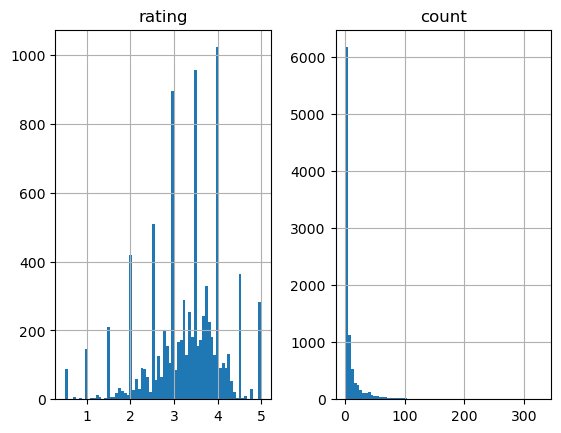

In [18]:
avgratings_df.hist(bins=70)

<AxesSubplot:xlabel='rating', ylabel='count'>

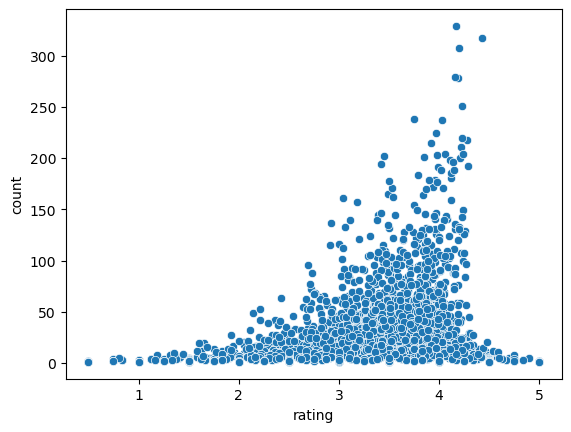

In [19]:
import seaborn as sns
sns.scatterplot(data=avgratings_df, x='rating', y='count')

# Create user movie matrix

In [20]:
user_movie_matrix= movies_ratings_df.pivot_table(index='userId', columns ='name', values='rating')
user_movie_matrix

name,'71,"'burbs, the",'hellboy': the seeds of creation,'night mother,'round midnight,'salem's lot,'til there was you,'tis the season for love,(500) days of summer,*batteries not included,...,zone 39,"zone, the",zookeeper,zoolander,zoolander 2,zoom,zootopia,zulu,¡three amigos!,à nous la liberté
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#top 10 movies based on ratings and counts
avgratings_df.sort_values('count', ascending=False).head(10)

,rating,count
name,,
forrest gump,4.164134,329
"shawshank redemption, the",4.429022,317
pulp fiction,4.197068,307
"silence of the lambs, the",4.161290,279
"matrix, the",4.192446,278
star wars: episode iv - a new hope,4.231076,251
jurassic park,3.750000,238
braveheart,4.031646,237
terminator 2: judgment day,3.970982,224


In [22]:
#Forrest Gump is the highest rated movie with most number of high ratings

In [23]:
jurassic_park_rating = user_movie_matrix['jurassic park']
jurassic_park_rating

userId
1      4.0
2      NaN
3      NaN
4      NaN
5      NaN
      ... 
606    2.5
607    4.0
608    3.0
609    3.0
610    5.0
Name: jurassic park, Length: 610, dtype: float64

In [24]:
similar_to_jurassic_park = user_movie_matrix.corrwith(jurassic_park_rating)
similar_to_jurassic_park.head(5)

C:\Users\deepa\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\deepa\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


name
'71                                      NaN
'burbs, the                         0.104077
'hellboy': the seeds of creation         NaN
'night mother                            NaN
'round midnight                          NaN
dtype: float64

In [25]:
corr_jurrpark = pd.DataFrame(data=similar_to_jurassic_park, columns=['correlation'])
corr_jurrpark.dropna(inplace=True)
corr_jurrpark.head()

,correlation
name,
"'burbs, the",0.104077
(500) days of summer,-0.125237
*batteries not included,0.290929
...and justice for all,-0.981981
10 cent pistol,-1.000000


In [26]:
corr_jurrpark = corr_jurrpark.join(avgratings_df['count'])


In [27]:
corr_jurrpark.head()

,correlation,count
name,,
"'burbs, the",0.104077,17
(500) days of summer,-0.125237,42
*batteries not included,0.290929,7
...and justice for all,-0.981981,3
10 cent pistol,-1.000000,2


In [28]:
movies_like_jurrpark = corr_jurrpark[corr_jurrpark['count']> 50].sort_values('correlation', ascending=False)
movies_like_jurrpark.head(6)

,correlation,count
name,,
jurassic park,1.000000,238
field of dreams,0.643783,56
kung fu panda,0.634736,54
lethal weapon,0.608894,75
the hunger games,0.591129,54
"bug's life, a",0.540132,92



# sort by high correlation


In [29]:
movies_like_jurrpark_corr = corr_jurrpark[corr_jurrpark['correlation']>=0.8].sort_values('count', ascending=False)
movies_like_jurrpark_corr.head(10)

,correlation,count
name,,
jurassic park,1.000000,238
zootopia,0.882712,32
rise of the planet of the apes,0.920379,27
men in black iii,0.816454,18
kung fu panda 2,0.871437,17
boyhood,0.869960,17
the theory of everything,0.815436,17
vicky cristina barcelona,0.872872,16
sunshine,0.809806,15


In [30]:
def get_movie_recommendation(movies, ratings, movie_name, n):
    #datacleaning
    for column in movies:
        if column == 'title':
            movies['title'] = movies.title.str.lower()
            movies[['name', 'year']] = movies['title'].str.split(' \(', 1, expand=True)
            movies['year'] = movies['year'].str.replace("\)", "", regex=True) 
        if column == 'genre':
            movies['genres'] = movies['genres'].str.replace("[^a-zA-Z0-9_]", ",", regex=True)
    #merge dataframes
    movies_ratings_df = pd.merge(movies,ratings, on = 'movieId')
    #keep necessary columns
    movies_ratings_df = movies_ratings_df[['movieId','userId','name','year','genres', 'rating']]
    #getaverageratings
    avgratings_df = pd.DataFrame(data=movies_ratings_df.groupby('name')['rating'].mean())
    avgratings_df['count'] = movies_ratings_df.groupby('name')['rating'].count()
    #create pivot table
    user_movie_matrix = movies_ratings_df.pivot_table(index='userId', columns ='name',     values='rating')
    #get similar movies
    movie_to_compare = user_movie_matrix.loc[:, movie_name]
    similar_movies = user_movie_matrix.corrwith(movie_to_compare)
    corr_movies = pd.DataFrame(data=similar_movies, columns=['correlation'])
    corr_movies.dropna(inplace=True)
    corr_movies = corr_movies.join(avgratings_df['count'])
    top10_corr = corr_movies[corr_movies['correlation']>=0.8].sort_values('count',       ascending=False).head(n)
    return top10_corr
   

In [31]:
get_movie_recommendation(movies, ratings, 'zootopia', 10)

C:\Users\deepa\anaconda3\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\deepa\anaconda3\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,correlation,count
name,,
jurassic park,0.882712,238
braveheart,0.831790,237
"lion king, the",0.835386,172
x-men,0.830620,133
batman begins,0.887439,116
taxi driver,0.818521,104
crimson tide,1.000000,103
four weddings and a funeral,1.000000,103
who framed roger rabbit?,0.829933,97


In [32]:
# store the trained pipeline
import pickle
with open('recommendersys.pkl', 'wb') as file:
    pickle.dump(get_movie_recommendation, file)

In [33]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
